In [17]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/home/amorales/Documents/projects/bias_2')

In [7]:
df = pd.read_csv('data/processed/features_new.csv', index_col=0)

/home/amorales/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df

,mutant_id,replica,242-246,116-119,166-170,215-240,34-38,127-73,124-205,23-271,...,207-227,16-26,16-33,17-26,16-30,133-226,287-39,285-291,130-135,profile
3,33,4,1.000,0.380,1.000,0.000,0.988,0.000,0.297,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0
4,33,5,1.000,0.565,0.995,0.000,1.000,0.000,0.405,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0
5,33,6,1.000,0.463,0.993,0.005,0.995,0.000,0.297,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0
6,33,7,1.000,0.472,1.000,0.000,0.990,0.018,0.325,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0
7,33,8,1.000,0.510,0.993,0.260,0.998,0.003,0.305,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,wt,4,0.993,0.537,0.998,0.000,1.000,0.472,0.357,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.000,0
249,wt,5,1.000,0.463,0.985,0.000,1.000,0.265,0.378,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0
250,wt,6,1.000,0.545,1.000,0.138,1.000,0.520,0.325,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0
251,wt,7,1.000,0.568,0.990,0.000,1.000,0.347,0.325,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0


In [9]:
c_cols = [c for c in df if '-' in c] # type: ignore

In [10]:
X = df[c_cols]

In [35]:
X_embedded = TSNE(n_components=2, init='random', perplexity=1.75).fit_transform(X)
X_embedded.shape

(175, 2)

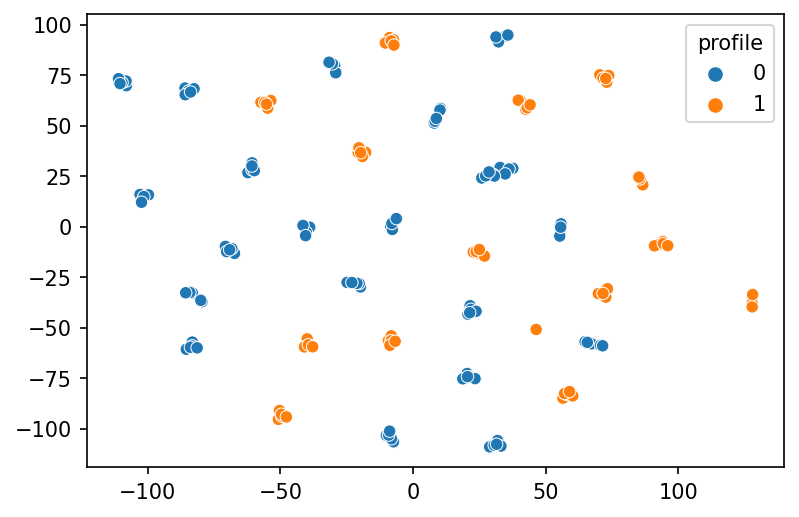

In [86]:
plt.figure(dpi=150)
sns.scatterplot(x=X_embedded[:,0], y = X_embedded[:,1], hue=df.profile)
plt.show()

In [60]:
import tensorflow as tf
import numpy as np

def autoencoder_embedding(data, n):
    # Define the autoencoder architecture
    input_dim = data.shape[1]
    encoding_dim = n
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    encoder_layer1 = tf.keras.layers.Dense(500, activation='relu')(input_layer)
    encoder_layer2 = tf.keras.layers.Dense(200, activation='relu')(encoder_layer1)
    encoder_layer3 = tf.keras.layers.Dense(100, activation='relu')(encoder_layer2)
    encoder_layer4 = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoder_layer3)
    decoder_layer1 = tf.keras.layers.Dense(100, activation='relu')(encoder_layer4)
    decoder_layer2 = tf.keras.layers.Dense(200, activation='relu')(decoder_layer1)
    decoder_layer3 = tf.keras.layers.Dense(500, activation='relu')(decoder_layer2)
    output_layer = tf.keras.layers.Dense(input_dim)(decoder_layer3)
    autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    # Compile the autoencoder model
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    autoencoder.fit(data, data, epochs=100, batch_size=30, shuffle=True, verbose=0)

    # Extract the encoder model
    encoder = tf.keras.models.Model(inputs=input_layer, outputs=encoder_layer4)

    # Embed the data into n dimensions
    embedded_data = encoder.predict(data)

    return embedded_data

In [64]:
embedding = autoencoder_embedding(X, 10)

In [69]:
embedding = pd.DataFrame(embedding)

In [82]:
embedding['profile'] = df.profile.astype(str).values

In [83]:
embedding

,0,1,2,3,4,5,6,7,8,9,profile
0,6.906758,4.340508,4.769523,0.0,0.0,5.378299,5.662283,0.0,0.0,0.000000,0
1,7.342471,4.194036,4.246589,0.0,0.0,5.420155,5.486105,0.0,0.0,0.000000,0
2,6.998528,4.747206,4.786596,0.0,0.0,5.289105,5.750248,0.0,0.0,0.000000,0
3,7.159517,4.689461,4.706432,0.0,0.0,5.189177,5.523834,0.0,0.0,0.000000,0
4,7.448386,4.071485,4.289130,0.0,0.0,5.279740,5.484724,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
170,7.361714,1.692560,3.447705,0.0,0.0,6.466265,1.418034,0.0,0.0,3.250209,0
171,7.597774,2.553731,2.990600,0.0,0.0,5.941291,1.173259,0.0,0.0,3.645069,0
172,7.515471,2.075741,3.230530,0.0,0.0,6.230149,1.431591,0.0,0.0,3.281443,0
173,7.358730,1.856809,3.475539,0.0,0.0,6.353436,1.530391,0.0,0.0,3.304401,0


<AxesSubplot:xlabel='5', ylabel='6'>

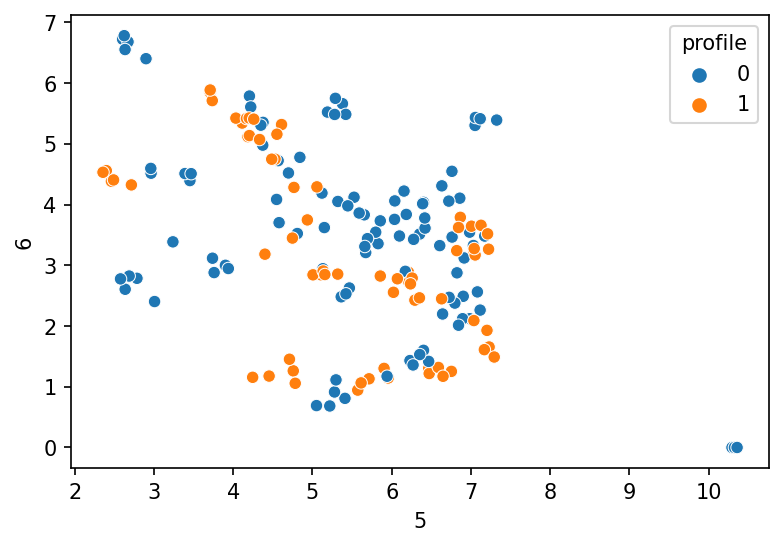

In [84]:
plt.figure(dpi=150)
sns.scatterplot(data=embedding, x=5, y=6, hue='profile')

<AxesSubplot:xlabel='0', ylabel='5'>

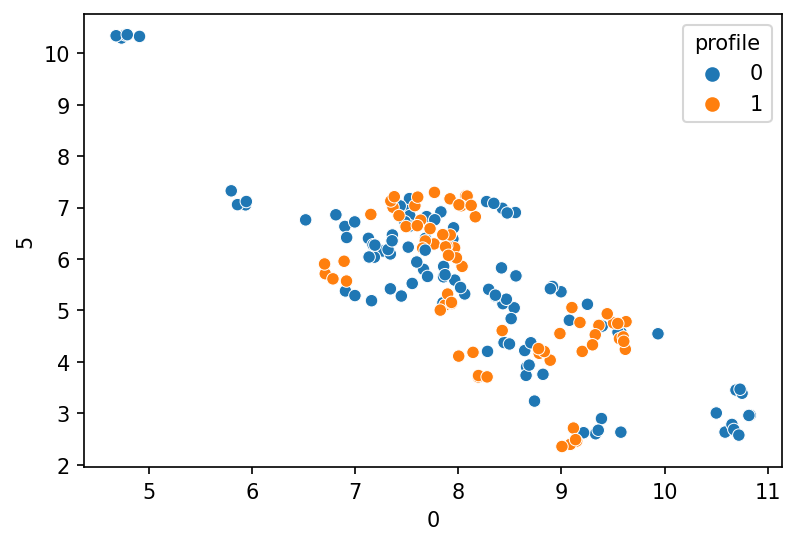

In [85]:
plt.figure(dpi=150)
sns.scatterplot(data=embedding, x=0, y=5, hue='profile')